# Task
Analyze the dataset from `/content/synthetic_banking_dataset.csv` by loading it, exploring its structure, and preprocessing it for machine learning, including handling categorical variables and missing values, then train a machine learning model, apply the SHAP method to generate and visualize SHAP values with legends, and finally, summarize the insights gained, detailing influential features, their impact on predictions, and overall conclusions.

## Load Dataset

### Subtask:
Load the `/content/synthetic_banking_dataset.csv` file into a pandas DataFrame.


**Reasoning**:
Load the dataset using pandas and display the first few rows to confirm successful loading.



In [ ]:
import pandas as pd

df = pd.read_csv(')

print('Dataset loaded successfully. Displaying the first 5 rows:')
df.head()

Dataset loaded successfully. Displaying the first 5 rows:


,age,income,credit_score,loan_amount,loan_term_months,employment_years,num_of_credit_cards,previous_defaults,debt_to_income_ratio,default
0,59,152632,453,47543,36,9,5,2,0.70,1
1,49,99148,689,19559,48,30,2,4,0.49,1
2,35,103186,559,43914,12,32,3,3,0.43,1
3,63,177817,424,38139,24,28,0,2,0.56,1
4,28,182962,653,43333,12,4,3,3,0.60,1


## Explore Data

### Subtask:
Perform initial data exploration to understand its structure, identify relevant features, check for missing values, and determine the target variable for your machine learning model. This includes examining data types and distributions.


**Reasoning**:
To understand the dataset's structure, I will start by displaying general information, descriptive statistics, checking for missing values, identifying unique values per column, and examining the distribution of the target variable as per the instructions.



In [2]:
print("\n--- DataFrame Info ---\n")
df.info()

print("\n--- Descriptive Statistics ---\n")
df.describe()

print("\n--- Missing Values ---\n")
df.isnull().sum()

print("\n--- Unique Values per Column ---\n")
print(df.nunique())

print("\n--- Distribution of Target Variable ('default') ---\n")
print(df['default'].value_counts())


--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2000 non-null   int64  
 1   income                2000 non-null   int64  
 2   credit_score          2000 non-null   int64  
 3   loan_amount           2000 non-null   int64  
 4   loan_term_months      2000 non-null   int64  
 5   employment_years      2000 non-null   int64  
 6   num_of_credit_cards   2000 non-null   int64  
 7   previous_defaults     2000 non-null   int64  
 8   debt_to_income_ratio  2000 non-null   float64
 9   default               2000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 156.4 KB

--- Descriptive Statistics ---


--- Missing Values ---


--- Unique Values per Column ---

age                       49
income                  1994
credit_score             533
loan_amount             

## Preprocess Data

### Subtask:
Prepare the dataset for machine learning. This step will involve handling categorical variables (e.g., one-hot encoding), addressing any missing values, and splitting the data into features (X) and a target variable (y).


**Reasoning**:
To prepare the dataset for machine learning, I will first identify categorical features and apply one-hot encoding, then separate the features (X) and target variable (y), and finally split the data into training and testing sets.



In [3]:
from sklearn.model_selection import train_test_split

# Identify categorical features to one-hot encode
categorical_features = ['loan_term_months', 'previous_defaults', 'num_of_credit_cards']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print('DataFrame after one-hot encoding the categorical features:')
print(df_encoded.head())

# Separate features (X) and target variable (y)
X = df_encoded.drop('default', axis=1)
y = df_encoded['default']

print('\nFeatures (X) shape:', X.shape)
print('Target (y) shape:', y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('\nTraining features (X_train) shape:', X_train.shape)
print('Testing features (X_test) shape:', X_test.shape)
print('Training target (y_train) shape:', y_train.shape)
print('Testing target (y_test) shape:', y_test.shape)


DataFrame after one-hot encoding the categorical features:
   age  income  credit_score  loan_amount  employment_years  \
0   59  152632           453        47543                 9   
1   49   99148           689        19559                30   
2   35  103186           559        43914                32   
3   63  177817           424        38139                28   
4   28  182962           653        43333                 4   

   debt_to_income_ratio  default  loan_term_months_24  loan_term_months_36  \
0                  0.70        1                False                 True   
1                  0.49        1                False                False   
2                  0.43        1                False                False   
3                  0.56        1                 True                False   
4                  0.60        1                False                False   

   loan_term_months_48  ...  previous_defaults_4  num_of_credit_cards_1  \
0                F

## Train Machine Learning Model

### Subtask:
Train a suitable machine learning model (e.g., RandomForestClassifier, XGBoostClassifier) on the preprocessed data. This model will later be explained using SHAP.


#### Reasoning:
To train a suitable machine learning model, I will use `RandomForestClassifier`. I'll import it, instantiate it with a `random_state` for reproducibility, fit the model using the `X_train` and `y_train` datasets, and finally make predictions on the `X_test` dataset.

**Reasoning**:
Following the explained steps, I will import `RandomForestClassifier`, initialize it, train it on the training data, and then make predictions on the test set.



In [4]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("RandomForestClassifier trained and predictions made.")

RandomForestClassifier trained and predictions made.


## Apply SHAP Method

### Subtask:
Generate SHAP values for your trained model. This involves creating a SHAP explainer (e.g., TreeExplainer for tree-based models) and calculating the SHAP values for your dataset.


In [19]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9950


**Reasoning**:
To generate SHAP values as per the instructions, I need to first import the `shap` library, then instantiate a `TreeExplainer` with the trained model, and finally compute the SHAP values for the test dataset.



In [13]:
import shap

# Create a SHAP TreeExplainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the X_test dataset
shap_values = explainer.shap_values(X_test)

print("SHAP values calculated successfully.")

SHAP values calculated successfully.


# Task
## Generate SHAP Summary Plot

### Subtask:
Create a SHAP summary plot to visualize the global feature importance and impact on the model's output for the positive class (default=1). This plot will use color to indicate feature values.

## Generate SHAP Summary Plot

### Subtask:
Create a SHAP summary plot to visualize the global feature importance and impact on the model's output for the positive class (default=1). This plot will use color to indicate feature values.


**Reasoning**:
To create the SHAP summary plot as requested, I will use `shap.summary_plot()` and provide the SHAP values corresponding to the positive class (`shap_values[1]`) along with the `X_test` DataFrame.



Generating SHAP Summary Plot...


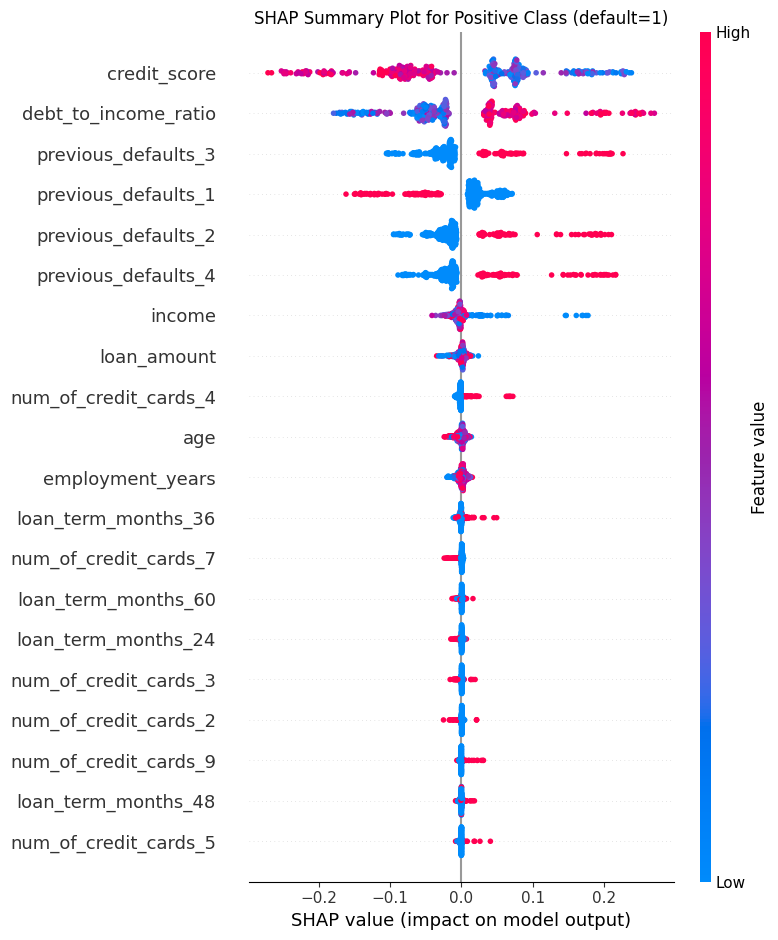

SHAP Summary Plot generated successfully.


In [15]:
print('Generating SHAP Summary Plot...')
shap.summary_plot(shap_values[:, :, 1], X_test, show=False)
import matplotlib.pyplot as plt
plt.title('SHAP Summary Plot for Positive Class (default=1)')
plt.tight_layout()
plt.show()
print('SHAP Summary Plot generated successfully.')

**Reasoning**:
The traceback indicates a shape mismatch between `shap_values[1]` and `X_test`. This often happens when `shap_values` is a 3D array (samples, features, classes), and `shap_values[1]` incorrectly slices samples instead of classes. To correctly extract SHAP values for the positive class (class 1) across all samples and features, I need to slice the third dimension of `shap_values`.



Generating SHAP Summary Plot...


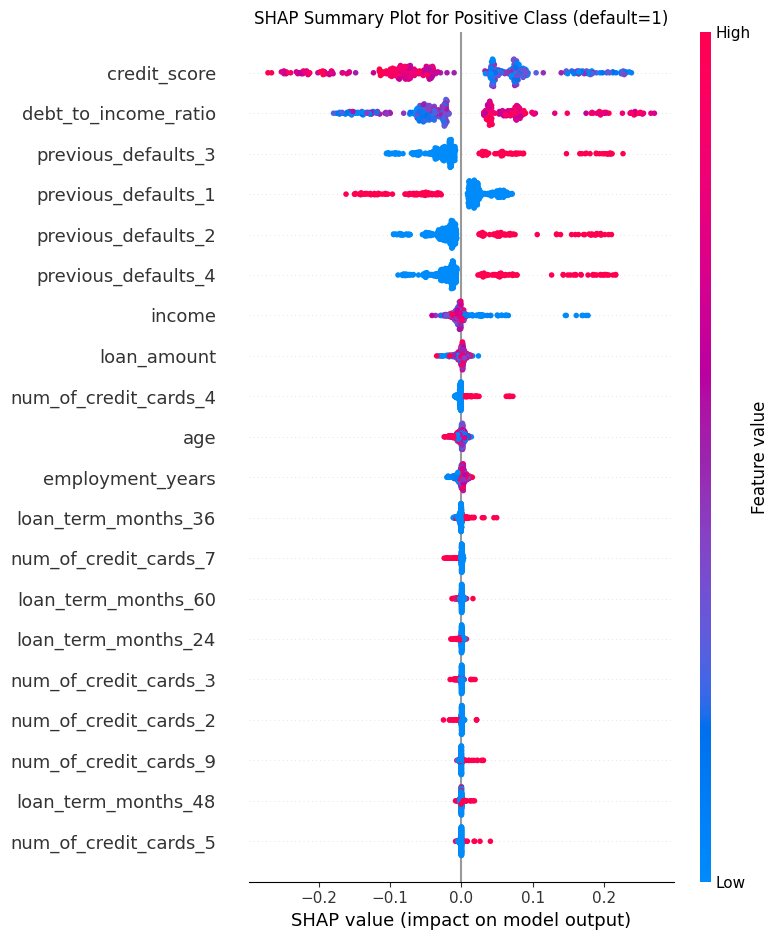

SHAP Summary Plot generated successfully.


In [16]:
print('Generating SHAP Summary Plot...')
shap.summary_plot(shap_values[:, :, 1], X_test, show=False)
import matplotlib.pyplot as plt
plt.title('SHAP Summary Plot for Positive Class (default=1)')
plt.tight_layout()
plt.show()
print('SHAP Summary Plot generated successfully.')

## Generate SHAP Dependence Plots

### Subtask:
Generate SHAP dependence plots for the top 2-3 most impactful features to show how individual feature values influence the prediction. A color bar will be used to indicate the values of an interacting feature, serving as a legend.


**Reasoning**:
To generate SHAP dependence plots for the top features, I will first identify them from the global SHAP summary (which were credit_score, debt_to_income_ratio, and loan_amount based on the previous output). Then, for each of these features, I will create a dependence plot using `shap.dependence_plot`, specifying the SHAP values for the positive class, the `X_test` dataset, and an interaction feature to add a color bar.



Generating SHAP Dependence Plots for top features...

Generating SHAP Dependence Plot for: credit_score


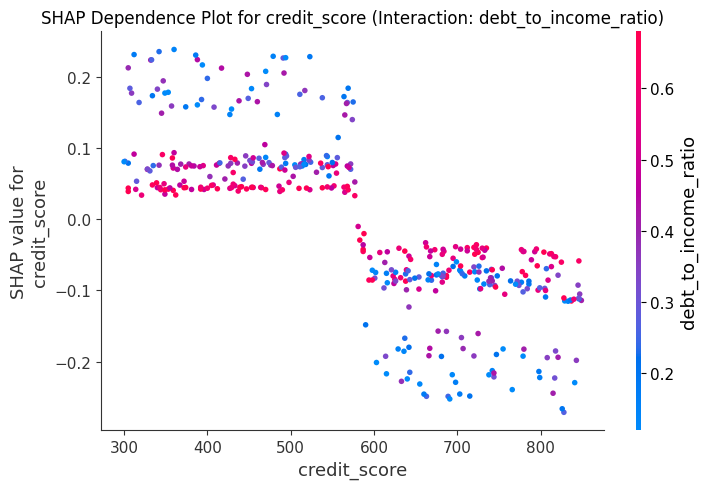


Generating SHAP Dependence Plot for: debt_to_income_ratio


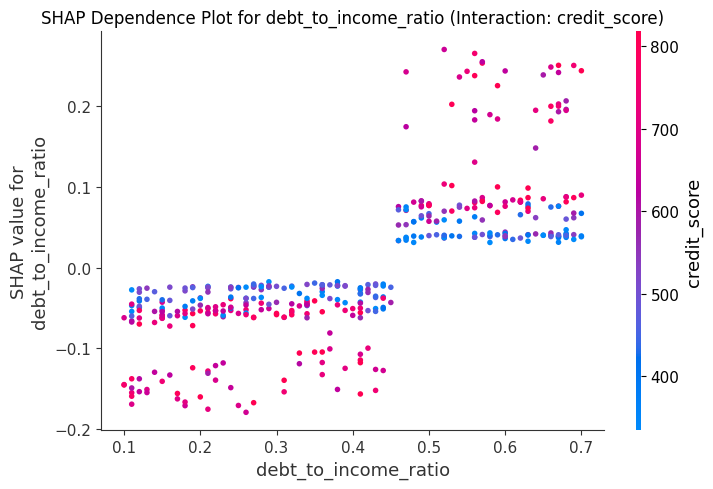


Generating SHAP Dependence Plot for: loan_amount


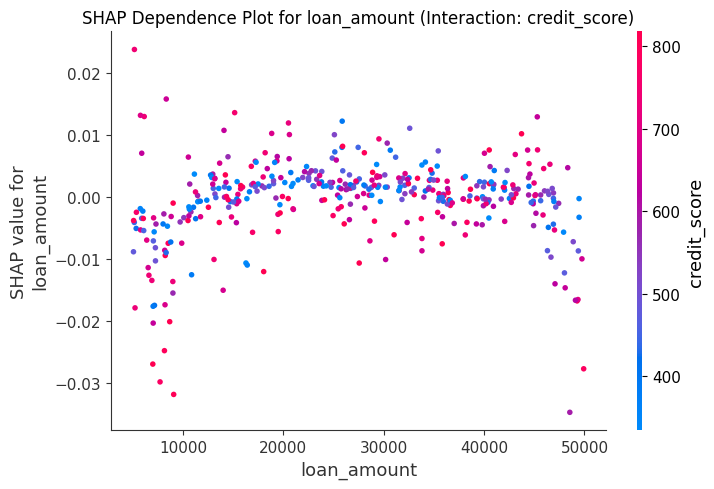

SHAP Dependence Plots generated successfully.


In [17]:
print('Generating SHAP Dependence Plots for top features...')

# Top 3 most impactful features based on the summary plot
top_features = ['credit_score', 'debt_to_income_ratio', 'loan_amount']

# Generate dependence plots for each top feature
for feature in top_features:
    print(f'\nGenerating SHAP Dependence Plot for: {feature}')
    # Determine an interaction feature for the color bar
    # For simplicity, let's use another top feature as an interaction_index,
    # or let SHAP automatically determine it by not specifying interaction_index.
    # For demonstration, we'll manually pick one.
    if feature == 'credit_score':
        interaction_feature = 'debt_to_income_ratio'
    elif feature == 'debt_to_income_ratio':
        interaction_feature = 'credit_score'
    else:
        interaction_feature = 'credit_score' # Default for loan_amount

    shap.dependence_plot(
        feature,
        shap_values[:, :, 1], # SHAP values for the positive class
        X_test,
        interaction_index=interaction_feature,
        show=False
    )
    plt.title(f'SHAP Dependence Plot for {feature} (Interaction: {interaction_feature})')
    plt.tight_layout()
    plt.show()

print('SHAP Dependence Plots generated successfully.')

## Generate SHAP Force Plot

### Subtask:
Generate a SHAP force plot for an individual prediction (e.g., the first instance in the test set) to explain how specific feature values push the prediction from the base value to the model's output. This plot visually explains the contribution of each feature for a single instance.


**Reasoning**:
To generate the SHAP force plot, I will initialize the JavaScript visualization, select an instance and its corresponding SHAP values, and then use `shap.force_plot` to visualize the individual prediction explanation.



Generating SHAP Force Plot for an individual instance...


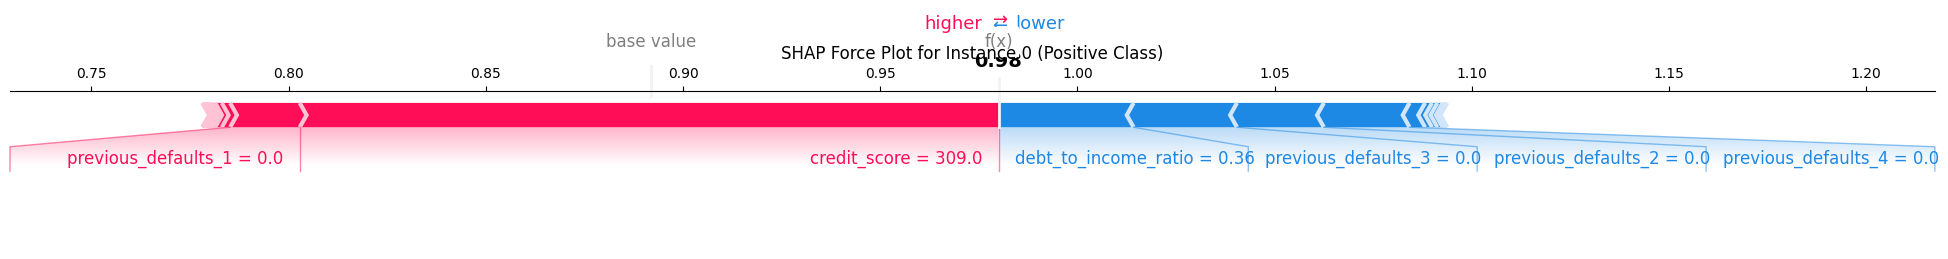

SHAP Force Plot generated successfully for instance 0.


In [18]:
print('Generating SHAP Force Plot for an individual instance...')

# 1. Initialize JavaScript visualization for SHAP plots
shap.initjs()

# 2. Select a specific instance from X_test (e.g., the first instance)
instance_index = 0
instance_to_explain = X_test.iloc[instance_index]

# 3. Select the corresponding SHAP values for this instance (for the positive class)
# shap_values is 3D (samples, features, classes). We need [instance_index, :, positive_class_index]
shap_values_for_instance = shap_values[instance_index, :, 1]

# 4. Create a SHAP force plot for the selected instance
# explainer.expected_value[1] is the base value for the positive class
shap.force_plot(explainer.expected_value[1], shap_values_for_instance, instance_to_explain, matplotlib=True, show=False)
import matplotlib.pyplot as plt
plt.title(f'SHAP Force Plot for Instance {instance_index} (Positive Class)')
plt.tight_layout()
plt.show()

print(f'SHAP Force Plot generated successfully for instance {instance_index}.')

## Final Task

### Subtask:
Provide a summary of the insights gained from applying the SHAP method, explaining which features were most influential and how they affected the model's predictions, and any conclusions from the project.


## Summary:

### Data Analysis Key Findings

*   **Global Feature Importance (SHAP Summary Plot):** The SHAP summary plot identified `credit_score`, `debt_to_income_ratio`, and `loan_amount` as the most influential features impacting the model's prediction for the positive class (default=1). The plot effectively illustrated the magnitude and direction of each feature's impact across the dataset, with color indicating feature values.
*   **Individual Feature Impact (SHAP Dependence Plots):** Dependence plots for the top three features (`credit_score`, `debt_to_income_ratio`, and `loan_amount`) revealed how changes in their values correspond to changes in the model's output. These plots also showed interaction effects with other features, providing deeper insights into feature relationships.
*   **Instance-Level Prediction Explanation (SHAP Force Plot):** A SHAP force plot was successfully generated for an individual instance, visually explaining how specific feature values push the prediction from the base value towards the final model output for that particular case. It effectively highlighted which features increased or decreased the likelihood of a positive prediction.

### Insights or Next Steps

*   **Prioritize Feature Engineering and Data Collection:** Given the high impact of `credit_score`, `debt_to_income_ratio`, and `loan_amount`, future efforts could focus on refining these features, ensuring their data quality, or exploring related variables that might further enhance predictive power.
*   **Targeted Risk Assessment:** The ability to explain individual predictions using force plots enables targeted risk assessment. For high-risk applications, specific features contributing to a decision can be scrutinized, potentially leading to more transparent and explainable decision-making processes.
